# CNN

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
from pathlib import Path
current_path = Path(os.getcwd())

In [ ]:
current_path

PosixPath('/content')

In [ ]:
new_path = current_path /"drive" / "MyDrive"/"드라이브"

In [ ]:
os.chdir(new_path)

In [ ]:
print(Path(os.getcwd()))

/content/drive/MyDrive/드라이브


## 1. 데이터 전처리

### 1) 데이터 불러오기

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d engesraahassan/covid19-ct-image

In [ ]:
!ls

In [ ]:
!unzip ./covid19-ct-image.zip -d ./data/covid19-ct-image

In [ ]:
import os, shutil, random
import warnings
warnings.filterwarnings('ignore')

In [ ]:
infected_dir = os.listdir('./data/covid19-ct-image/COVID_CT/Infected')
not_dir = os.listdir('./data/covid19-ct-image/COVID_CT/Not_Infected')

In [ ]:
train_percentage = 0.8

In [ ]:
def get_split(original, train_percentage):

    random.shuffle(original) 
    n = len(original)
    
    train_index = int(train_percentage*n)
    val_index = int((n - train_index)/2) + train_index
    
    train = original[:train_index]
    val = original[train_index:val_index]
    test = original[val_index:]
    
    return train, val, test

In [ ]:
infected_train, infected_val, infected_test = get_split(infected_dir, train_percentage)

In [ ]:
not_train, not_val, not_test = get_split(not_dir, train_percentage)

In [ ]:
# Infected
os.makedirs("./data/covid19-ct-image/COVID_CT/Train/Infected")
os.makedirs("./data/covid19-ct-image/COVID_CT/Valid/Infected")
os.makedirs("./data/covid19-ct-image/COVID_CT/Test/Infected")
# Not_Infected
os.makedirs("./data/covid19-ct-image/COVID_CT/Train/Not_Infected")
os.makedirs("./data/covid19-ct-image/COVID_CT/Valid/Not_Infected")
os.makedirs("./data/covid19-ct-image/COVID_CT/Test/Not_Infected")

In [ ]:
# Infected
[shutil.copy('./data/covid19-ct-image/COVID_CT/Infected/' + file, './data/covid19-ct-image/COVID_CT/Train/Infected/'+ file) for file in infected_train]
[shutil.copy('./data/covid19-ct-image/COVID_CT/Infected/' + file, './data/covid19-ct-image/COVID_CT/Valid/Infected/'+ file) for file in infected_val]
[shutil.copy('./data/covid19-ct-image/COVID_CT/Infected/' + file, './data/covid19-ct-image/COVID_CT/Test/Infected/'+ file) for file in infected_test]
# Not Infected
[shutil.copy('./data/covid19-ct-image/COVID_CT/Not_Infected/' + file, './data/covid19-ct-image/COVID_CT/Train/Not_Infected/'+ file) for file in not_train]
[shutil.copy('./data/covid19-ct-image/COVID_CT/Not_Infected/' + file, './data/covid19-ct-image/COVID_CT/Valid/Not_Infected/'+ file) for file in not_val]
[shutil.copy('./data/covid19-ct-image/COVID_CT/Not_Infected/' + file, './data/covid19-ct-image/COVID_CT/Test/Not_Infected/'+ file) for file in not_test]

['./data/covid19-ct-image/COVID_CT/Test/Not_Infected/(437).jpg',
 './data/covid19-ct-image/COVID_CT/Test/Not_Infected/(313).jpg',
 './data/covid19-ct-image/COVID_CT/Test/Not_Infected/(408).jpg',
 './data/covid19-ct-image/COVID_CT/Test/Not_Infected/(345).jpg',
 './data/covid19-ct-image/COVID_CT/Test/Not_Infected/(417).jpg',
 './data/covid19-ct-image/COVID_CT/Test/Not_Infected/(416).jpg',
 './data/covid19-ct-image/COVID_CT/Test/Not_Infected/(230).jpg',
 './data/covid19-ct-image/COVID_CT/Test/Not_Infected/(477).jpg',
 './data/covid19-ct-image/COVID_CT/Test/Not_Infected/(314).jpg',
 './data/covid19-ct-image/COVID_CT/Test/Not_Infected/(3).jpg',
 './data/covid19-ct-image/COVID_CT/Test/Not_Infected/(221).jpg',
 './data/covid19-ct-image/COVID_CT/Test/Not_Infected/(121).jpg',
 './data/covid19-ct-image/COVID_CT/Test/Not_Infected/(378).jpg',
 './data/covid19-ct-image/COVID_CT/Test/Not_Infected/(413).jpg',
 './data/covid19-ct-image/COVID_CT/Test/Not_Infected/(533).jpg',
 './data/covid19-ct-image/C

In [ ]:
train_dir = "./data/covid19-ct-image/COVID_CT/Train"
valid_dir = "./data/covid19-ct-image/COVID_CT/Valid"
test_dir = "./data/covid19-ct-image/COVID_CT/Test"

In [ ]:
print("train data: {} infected images, {} not infected images".format(len(os.listdir(train_dir+'/Infected')), len(os.listdir(train_dir+'/Not_Infected'))))
print("valid data: {} infected images, {} not infected images".format(len(os.listdir(valid_dir+'/Infected')), len(os.listdir(valid_dir+'/Not_Infected'))))
print("test data: {} infected images, {} not infected images".format(len(os.listdir(test_dir+'/Infected')), len(os.listdir(test_dir+'/Not_Infected'))))

train data: 400 infected images, 440 not infected images
valid data: 50 infected images, 55 not infected images
test data: 51 infected images, 55 not infected images


### 2) 이미지 출력

In [ ]:
from glob import glob
import cv2

In [ ]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename), cv2.IMREAD_GRAYSCALE)
        if img is not None:
            images.append(img)
    return images

In [ ]:
infected_images = load_images_from_folder(train_dir+'/Infected')
not_images = load_images_from_folder(train_dir+'/Not_Infected')

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def plot_images(images, title):
    nrows, ncols = 5, 8
    figsize = [10, 6]

    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize, facecolor=(1, 1, 1))

    for i, axi in enumerate(ax.flat):
        axi.imshow(images[i], cmap='gray')
        axi.set_axis_off()

    plt.suptitle(title, fontsize=24)
    plt.tight_layout(pad=0.2, rect=[0, 0, 1, 0.9])
    plt.show()

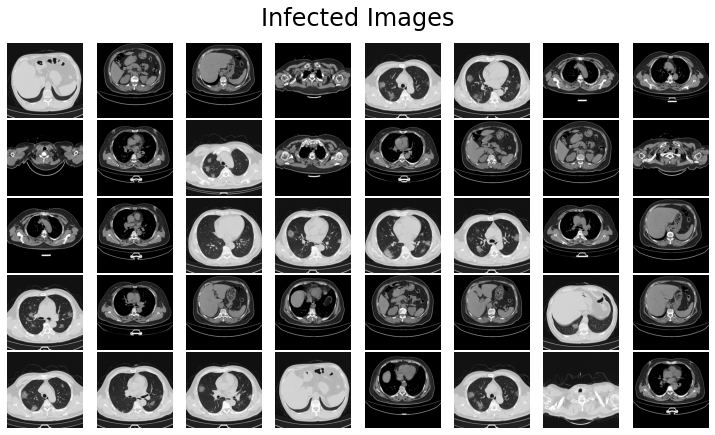

In [ ]:
plot_images(infected_images, 'Infected Images')

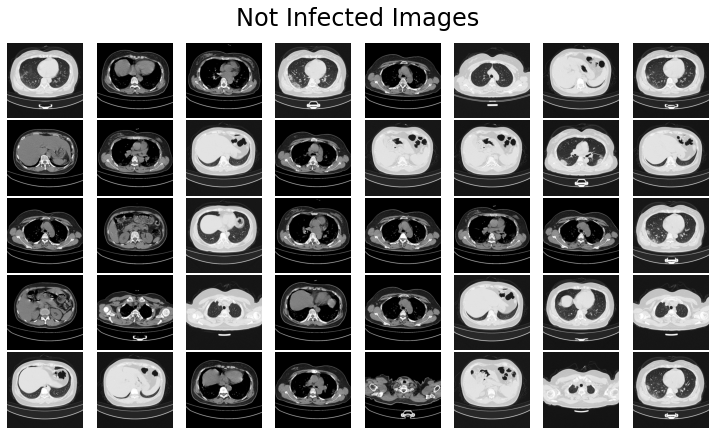

In [ ]:
plot_images(not_images, 'Not Infected Images')

## 2. CNN

### 1) 데이터 증강

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
IMAGE_SIZE = (256, 256)
BATCH_SIZE = 32
NUM_EPOCHS = 50

In [ ]:
train_datagen = ImageDataGenerator(
        rescale=1. / 255,
        rotation_range=5,
        width_shift_range=0.05,
        height_shift_range=0.05,
        brightness_range=[0.5, 1.0],
        zoom_range=0.15
    )

In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=IMAGE_SIZE,
        batch_size=BATCH_SIZE,
        color_mode='grayscale',
        class_mode='binary'
    )

Found 840 images belonging to 2 classes.


In [ ]:
def plot_generator_images(images, title):
    nrows, ncols = 4, 8
    figsize = [10, 6]

    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize, facecolor=(1, 1, 1))

    for i, axi in enumerate(ax.flat):
        axi.imshow(images[i].reshape(256, 256), cmap='gray')
        axi.set_axis_off()

    plt.suptitle(title, fontsize=24)
    plt.tight_layout(pad=0.2, rect=[0, 0, 1, 0.9])
    plt.show()

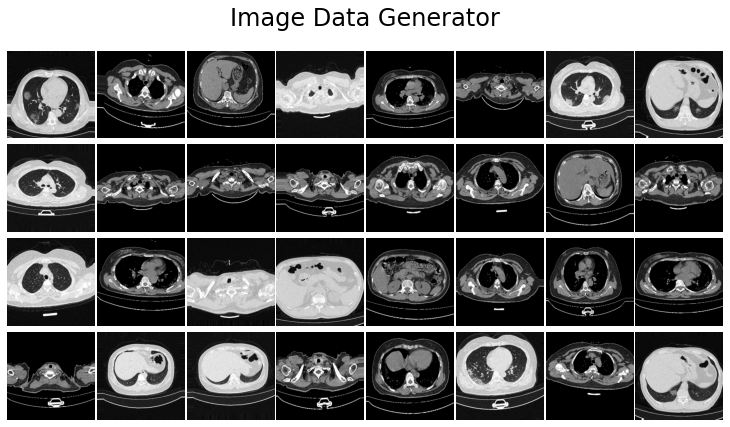

In [ ]:
X_train, y_train = next(train_generator)
plot_generator_images(X_train, 'Image Data Generator')

* 잘못된 데이터 증강 예시

In [ ]:
train_datagen2 = ImageDataGenerator(
        rescale=1. / 255,
        rotation_range=5,
        width_shift_range=0.05,
        height_shift_range=0.05,
        brightness_range=[0.5, 1.0],
        shear_range=0.05,
        zoom_range=0.15,
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode="constant",
        cval=255
    )

In [ ]:
train_generator2 = train_datagen2.flow_from_directory(
        train_dir,
        target_size=IMAGE_SIZE,
        batch_size=BATCH_SIZE,
        color_mode='grayscale',
        class_mode='binary'
    )

Found 840 images belonging to 2 classes.


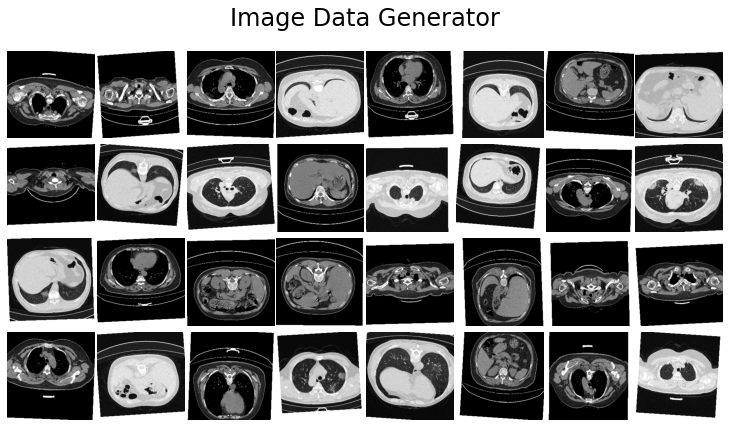

In [ ]:
X_train, y_train = next(train_generator2)
plot_generator_images(X_train, 'Image Data Generator')

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1. / 255)

In [ ]:
validation_generator = test_datagen.flow_from_directory(
        valid_dir,
        target_size=IMAGE_SIZE,
        batch_size=BATCH_SIZE,
        color_mode='grayscale',
        class_mode='binary'
    )

Found 105 images belonging to 2 classes.


In [ ]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=IMAGE_SIZE,
        shuffle=False,
        color_mode='grayscale',
        class_mode='binary'
    )

Found 106 images belonging to 2 classes.


In [ ]:
train_generator.class_indices

{'Infected': 0, 'Not_Infected': 1}

### 2) CNN

In [ ]:
from keras.models import Model, Input, Sequential, load_model
from keras.layers import AveragePooling2D, Dense, Dropout, Conv2D, MaxPool2D, Flatten

In [ ]:
input_shape = (256, 256, 1)

In [ ]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation="relu",input_shape=input_shape))

model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512,activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(1,activation="sigmoid"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 32)      320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 252, 252, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 126, 126, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 126, 126, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 124, 124, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 62, 62, 64)        0

In [ ]:
from tensorflow.keras.optimizers import Adam

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

In [ ]:
from keras.utils import plot_model

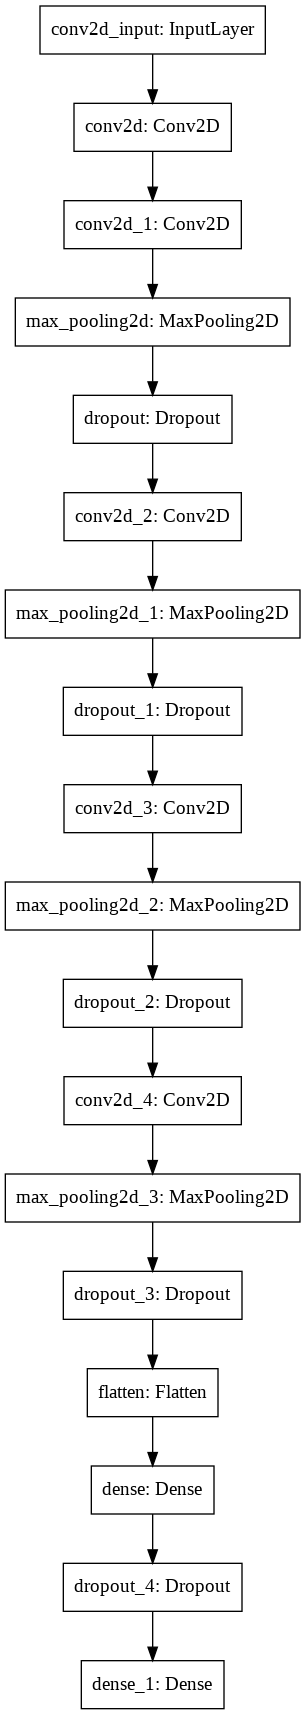

In [ ]:
plot_model(model)

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', mode='min', baseline=0.7, patience=3) 

In [ ]:
model_saver = ModelCheckpoint(filepath = current_path/"Colab Notebooks"/"ct_cnn3.h5",
                             monitor = 'val_accuracy',
                             mode = 'max',
                             verbose=1,
                             save_best_only=True)

In [ ]:
lr_scheduler = ReduceLROnPlateau(monitor="val_loss",
                                 factor=0.1, 
                                 patience=3, 
                                 verbose=1,
                                 min_delta=1e-4, 
                                 min_lr=1e-4) 

In [ ]:
model_train = model.fit_generator(train_generator, 
                                  validation_data=validation_generator,
                                  steps_per_epoch = 10, 
                                  epochs = NUM_EPOCHS,
                                  callbacks = [early_stopping, model_saver, lr_scheduler])

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
10/10 [==============================] - ETA: 0s - loss: 0.7766 - accuracy: 0.4625 
Epoch 00001: val_accuracy improved from -inf to 0.52381, saving model to /content/Colab Notebooks/ct_cnn3.h5
10/10 [==============================] - 138s 14s/step - loss: 0.7766 - accuracy: 0.4625 - val_loss: 0.6904 - val_accuracy: 0.5238
Epoch 2/50
10/10 [==============================] - ETA: 0s - loss: 0.6914 - accuracy: 0.5281 
Epoch 00002: val_accuracy improved from 0.52381 to 0.58095, saving model to /content/Colab Notebooks/ct_cnn3.h5
10/10 [==============================] - 114s 11s/step - loss: 0.6914 - accuracy: 0.5281 - val_loss: 0.6787 - val_accuracy: 0.5810
Epoch 3/50
10/10 [==============================] - ETA: 0s - loss: 0.6524 - accuracy: 0.6375 
Epoch 00003: val_accuracy improved from 0.58095 to 0.94286, saving model to /content/Colab Notebooks/ct_cnn3.h5
10/10 [==============================] - 113

In [ ]:
scores = model.evaluate_generator(test_generator)
print('Test loss: {:.4f}, Test accuracy: {:.4f}'.format(scores[0], scores[1]))

Instructions for updating:
Please use Model.evaluate, which supports generators.
Test loss: 0.1439, Test accuracy: 0.9151


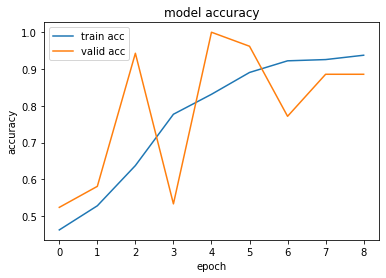

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(model_train.history['accuracy'], label='train acc')
plt.plot(model_train.history['val_accuracy'], label='valid acc')
plt.legend()
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.savefig('Cnn_accuracy')

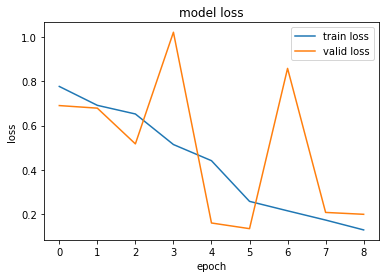

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(model_train.history['loss'], label='train loss')
plt.plot(model_train.history['val_loss'], label='valid loss')
plt.legend()
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()
plt.savefig('Cnn_loss')

## 3. VGG16

### 1) VGG16

In [ ]:
from tensorflow.keras.applications import VGG16

In [ ]:
input_shape = (224, 224, 3)

In [ ]:
vgg = VGG16(weights='imagenet', include_top=False, input_shape= input_shape)

In [ ]:
model = Sequential()
model.add(vgg)
model.add(Flatten())
model.add(Dense(512,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(2,activation="softmax"))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               12845568  
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 1026      
Total params: 27,561,282
Trainable params: 27,561,282
Non-trainable params: 0
_________________________________________________________________


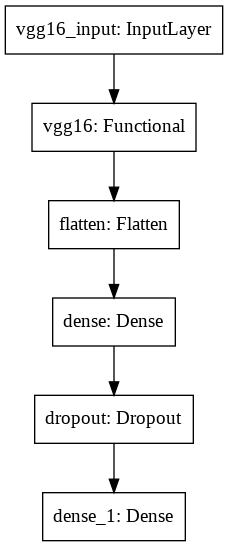

In [ ]:
from keras.utils import plot_model
plot_model(model)

In [ ]:
model.compile(optimizer='Adam',
              loss='categorical_crossentropy' ,
              metrics=['accuracy'])

In [ ]:
train_generator=train_datagen.flow_from_directory(train_dir,
                                                  target_size=(224, 224),
                                                  color_mode='rgb' ,
                                                  batch_size=32,
                                                  class_mode='categorical' ,
                                                  shuffle = True)

Found 840 images belonging to 2 classes.


In [ ]:
validation_generator = test_datagen.flow_from_directory(valid_dir,
                                                  target_size=(224, 224),
                                                  color_mode='rgb' ,
                                                  batch_size=32,
                                                  class_mode='categorical')

Found 105 images belonging to 2 classes.


In [ ]:
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(224, 224),
                                                  color_mode='rgb' ,
                                                  batch_size=32,
                                                  class_mode='categorical')

Found 106 images belonging to 2 classes.


In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', mode='min', baseline=0.7, patience=5)

In [ ]:
model_saver = ModelCheckpoint(filepath = current_path/"Colab Notebooks"/"vgg.h5",
                             monitor = 'val_accuracy',
                             mode = 'max',
                             verbose=1,
                             save_best_only=True)

In [ ]:
lr_scheduler = ReduceLROnPlateau(monitor="val_accuracy",
                                 factor=0.1, 
                                 patience=3, 
                                 verbose=1,
                                 min_delta=0.001, 
                                 min_lr=0.0001) 

In [ ]:
vgg_train = model.fit_generator(train_generator, 
                                validation_data=validation_generator,
                                steps_per_epoch = 10, 
                                epochs = NUM_EPOCHS,
                                callbacks = [early_stopping, model_saver, lr_scheduler])

Epoch 1/50
10/10 [==============================] - ETA: 0s - loss: 0.6975 - accuracy: 0.5743 
Epoch 00001: val_accuracy did not improve from 0.54286
10/10 [==============================] - 575s 58s/step - loss: 0.6975 - accuracy: 0.5743 - val_loss: 0.6925 - val_accuracy: 0.5238
Epoch 2/50
10/10 [==============================] - ETA: 0s - loss: 0.6915 - accuracy: 0.5469 
Epoch 00002: val_accuracy did not improve from 0.54286
10/10 [==============================] - 575s 58s/step - loss: 0.6915 - accuracy: 0.5469 - val_loss: 0.6922 - val_accuracy: 0.5238
Epoch 3/50
10/10 [==============================] - ETA: 0s - loss: 0.6936 - accuracy: 0.4969 
Epoch 00003: val_accuracy did not improve from 0.54286
10/10 [==============================] - 576s 58s/step - loss: 0.6936 - accuracy: 0.4969 - val_loss: 0.6921 - val_accuracy: 0.5238
Epoch 4/50
10/10 [==============================] - ETA: 0s - loss: 0.6938 - accuracy: 0.5031 
Epoch 00004: val_accuracy did not improve from 0.54286

Epoch 

In [ ]:
scores = model.evaluate_generator(test_generator)
print('Test loss: {:.4f}, Test accuracy: {:.4f}'.format(scores[0], scores[1]))

Test loss: 0.6925, Test accuracy: 0.5189


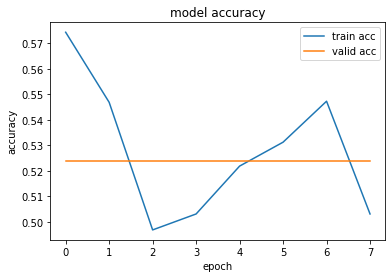

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(vgg_train.history['accuracy'], label='train acc')
plt.plot(vgg_train.history['val_accuracy'], label='valid acc')
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.savefig('Vgg_accuracy')

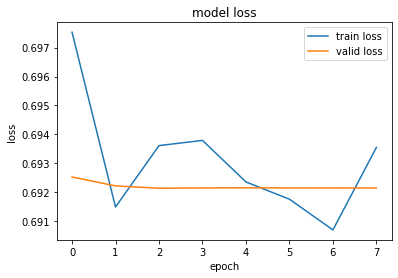

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(vgg_train.history['loss'], label='train loss')
plt.plot(vgg_train.history['val_loss'], label='valid loss')
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()
plt.savefig('Vgg_loss')

### 2) KFold

In [ ]:
import cv2, os

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename), cv2.IMREAD_COLOR)
        img = cv2.resize(img, dsize=(224, 224), interpolation=cv2.INTER_AREA)
        if img is not None:
            images.append(img)
    return images

In [ ]:
infect_dir = './data/covid19-ct-image/COVID_CT/Infected/'
not_dir = './data/covid19-ct-image/COVID_CT/Not_Infected/'

In [ ]:
infected = load_images_from_folder(infect_dir)
n_infected = load_images_from_folder(not_dir)

In [ ]:
print('Infected: {}, Not_Infected: {}'.format(len(infected),len(n_infected)))

Infected: 501, Not_Infected: 550


In [ ]:
infected.extend(n_infected)
X = np.asarray(infected).reshape((-1,224,224,3)).astype('float32')/255.

In [ ]:
labels = []
for i in range(501):
    labels.append(['0'])
for i in range(550):
    labels.append(['1'])

In [ ]:
labels = pd.get_dummies(pd.DataFrame(labels))

In [ ]:
y = np.asarray(labels).astype('float32').reshape((-1,2))

In [ ]:
from sklearn.model_selection import train_test_split
X_train_vgg, X_test_vgg, y_train_vgg, y_test_vgg = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=3, shuffle=False)

In [ ]:
from tensorflow.keras.applications import VGG16

In [ ]:
from keras.models import Model, Input, Sequential, load_model
from keras.layers import AveragePooling2D, Dense, Dropout, Conv2D, MaxPool2D, Flatten

In [ ]:
input_shape = (224, 224, 3)
vgg = VGG16(weights='imagenet', include_top=False, input_shape= input_shape)
model = Sequential()
model.add(vgg)
model.add(Flatten())
model.add(Dense(224,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(2,activation="softmax"))
model.compile(optimizer='Adam',
              loss='categorical_crossentropy' ,
              metrics=['accuracy'])

In [ ]:
NUM_EPOCHS = 5

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

In [ ]:
import matplotlib.pyplot as plt

Epoch 1/5
18/18 [==============================] - ETA: 0s - loss: 2.0747 - accuracy: 0.4893 
Epoch 00001: val_accuracy improved from -inf to 0.50357, saving model to /content/drive/My Drive/드라이브/Colab Notebooks/ct_cnn_vgg2.h5
18/18 [==============================] - 1094s 61s/step - loss: 2.0747 - accuracy: 0.4893 - val_loss: 0.6904 - val_accuracy: 0.5036
Epoch 2/5
18/18 [==============================] - ETA: 0s - loss: 0.7226 - accuracy: 0.4679 
Epoch 00002: val_accuracy did not improve from 0.50357
18/18 [==============================] - 1088s 60s/step - loss: 0.7226 - accuracy: 0.4679 - val_loss: 0.6920 - val_accuracy: 0.5036
Epoch 3/5
18/18 [==============================] - ETA: 0s - loss: 0.6912 - accuracy: 0.5357 
Epoch 00003: val_accuracy did not improve from 0.50357
18/18 [==============================] - 1084s 60s/step - loss: 0.6912 - accuracy: 0.5357 - val_loss: 0.6933 - val_accuracy: 0.5036
Epoch 4/5
18/18 [==============================] - ETA: 0s - loss: 0.6892 -

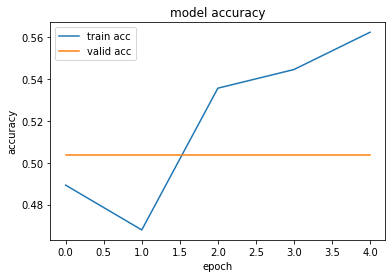

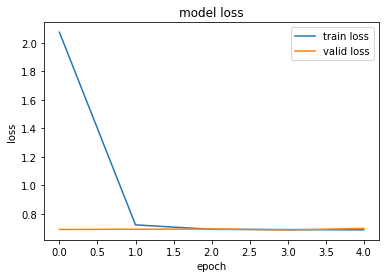

Epoch 1/5
18/18 [==============================] - ETA: 0s - loss: 0.6811 - accuracy: 0.5625 
Epoch 00001: val_accuracy improved from -inf to 0.58929, saving model to /content/drive/My Drive/드라이브/Colab Notebooks/ct_cnn_vgg2.h5
18/18 [==============================] - 1084s 60s/step - loss: 0.6811 - accuracy: 0.5625 - val_loss: 0.6723 - val_accuracy: 0.5893
Epoch 2/5
18/18 [==============================] - ETA: 0s - loss: 0.5977 - accuracy: 0.6482 
Epoch 00002: val_accuracy improved from 0.58929 to 0.90000, saving model to /content/drive/My Drive/드라이브/Colab Notebooks/ct_cnn_vgg2.h5
18/18 [==============================] - 1088s 60s/step - loss: 0.5977 - accuracy: 0.6482 - val_loss: 0.3770 - val_accuracy: 0.9000
Epoch 3/5
18/18 [==============================] - ETA: 0s - loss: 0.2582 - accuracy: 0.8821 
Epoch 00003: val_accuracy improved from 0.90000 to 0.91429, saving model to /content/drive/My Drive/드라이브/Colab Notebooks/ct_cnn_vgg2.h5
18/18 [==============================

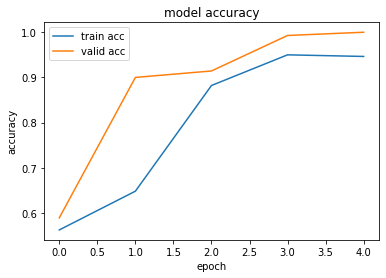

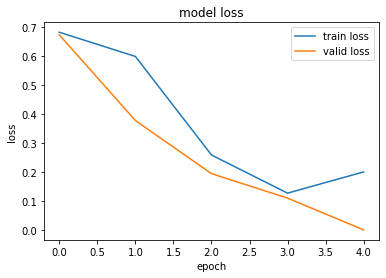

Epoch 1/5
18/18 [==============================] - ETA: 0s - loss: 0.0376 - accuracy: 0.9964 
Epoch 00001: val_accuracy improved from -inf to 0.87857, saving model to /content/drive/My Drive/드라이브/Colab Notebooks/ct_cnn_vgg2.h5
18/18 [==============================] - 1086s 60s/step - loss: 0.0376 - accuracy: 0.9964 - val_loss: 1.0214 - val_accuracy: 0.8786
Epoch 2/5
18/18 [==============================] - ETA: 0s - loss: 0.6365 - accuracy: 0.6857 
Epoch 00002: val_accuracy did not improve from 0.87857
18/18 [==============================] - 1080s 60s/step - loss: 0.6365 - accuracy: 0.6857 - val_loss: 0.6990 - val_accuracy: 0.6750
Epoch 3/5
18/18 [==============================] - ETA: 0s - loss: 0.6350 - accuracy: 0.6839 
Epoch 00003: val_accuracy did not improve from 0.87857
18/18 [==============================] - 1077s 60s/step - loss: 0.6350 - accuracy: 0.6839 - val_loss: 0.4981 - val_accuracy: 0.6750
Epoch 4/5
18/18 [==============================] - ETA: 0s - loss: 0.3682 -

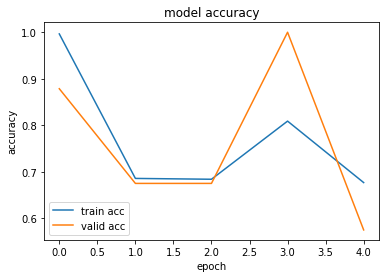

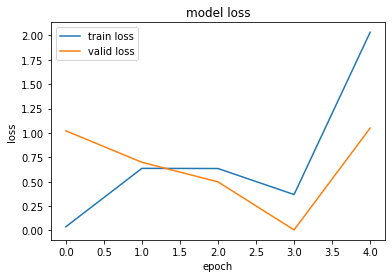

<Figure size 432x288 with 0 Axes>

In [ ]:
for train_index, test_index in kf.split(X_train_vgg, y_train_vgg):
    X_train = X_train_vgg[train_index]
    y_train = y_train_vgg[train_index]
    X_valid = X_train_vgg[test_index]
    y_valid = y_train_vgg[test_index]
    
    early_stopping = EarlyStopping(monitor='val_loss', mode='min', baseline=0.7, patience=3)
    
    lr_scheduler = ReduceLROnPlateau(monitor="val_loss",
                                 factor=0.1, 
                                 patience=3, 
                                 verbose=1,
                                 min_delta=1e-4, 
                                 min_lr=1e-4) 
    model_saver = ModelCheckpoint(filepath = "/content/drive/My Drive/드라이브/Colab Notebooks/ct_cnn_vgg2.h5",
                             monitor = 'val_accuracy',
                             mode = 'max',
                             verbose=1,
                             save_best_only=True)
    
    vgg2_train = model.fit(X_train, y_train,
                           validation_data=(X_valid, y_valid), 
                           epochs = NUM_EPOCHS,
                           callbacks = [early_stopping, model_saver, lr_scheduler])
  
    
    # Accuracy
    plt.plot(vgg2_train.history['accuracy'], label='train acc')
    plt.plot(vgg2_train.history['val_accuracy'], label='valid acc')
    plt.title('model accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend()
    plt.show()
    plt.savefig('Vgg2_accuracy')

    # Loss
    plt.plot(vgg2_train.history['loss'], label='train loss')
    plt.plot(vgg2_train.history['val_loss'], label='valid loss')
    plt.title('model loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend()
    plt.show()
    plt.savefig('Vgg2_loss')

In [ ]:
scores = model.evaluate(X_test_vgg, y_test_vgg)
print('Test loss: {:.4f}, Test accuracy: {:.4f}'.format(scores[0], scores[1]))

7/7 [==============================] - 88s 13s/step - loss: 1.2349 - accuracy: 0.4976
Test loss: 1.2349, Test accuracy: 0.4976


Epoch 1/10
18/18 [==============================] - ETA: 0s - loss: 0.7273 - accuracy: 0.5536 
Epoch 00001: val_accuracy improved from -inf to 0.50357, saving model to /content/drive/My Drive/드라이브/Colab Notebooks/ct_cnn_vgg3.h5
18/18 [==============================] - 1068s 59s/step - loss: 0.7273 - accuracy: 0.5536 - val_loss: 0.7503 - val_accuracy: 0.5036
Epoch 2/10
18/18 [==============================] - ETA: 0s - loss: 0.6819 - accuracy: 0.5607 
Epoch 00002: val_accuracy improved from 0.50357 to 0.74286, saving model to /content/drive/My Drive/드라이브/Colab Notebooks/ct_cnn_vgg3.h5
18/18 [==============================] - 1068s 59s/step - loss: 0.6819 - accuracy: 0.5607 - val_loss: 0.6092 - val_accuracy: 0.7429
Epoch 3/10
18/18 [==============================] - ETA: 0s - loss: 0.3939 - accuracy: 0.8071 
Epoch 00003: val_accuracy improved from 0.74286 to 0.95357, saving model to /content/drive/My Drive/드라이브/Colab Notebooks/ct_cnn_vgg3.h5
18/18 [===========================

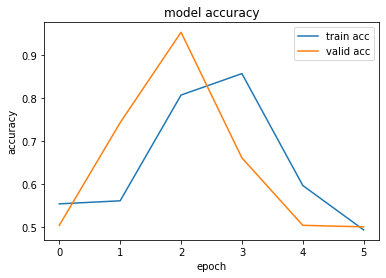

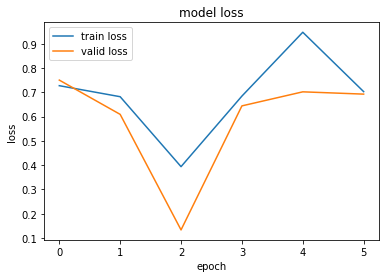

Epoch 1/10
18/18 [==============================] - ETA: 0s - loss: 0.6919 - accuracy: 0.5429 
Epoch 00001: val_accuracy improved from -inf to 0.51071, saving model to /content/drive/My Drive/드라이브/Colab Notebooks/ct_cnn_vgg3.h5
18/18 [==============================] - 1072s 60s/step - loss: 0.6919 - accuracy: 0.5429 - val_loss: 0.6920 - val_accuracy: 0.5107
Epoch 2/10
18/18 [==============================] - ETA: 0s - loss: 0.6894 - accuracy: 0.5625 
Epoch 00002: val_accuracy did not improve from 0.51071
18/18 [==============================] - 1066s 59s/step - loss: 0.6894 - accuracy: 0.5625 - val_loss: 0.6914 - val_accuracy: 0.5107
Epoch 3/10
18/18 [==============================] - ETA: 0s - loss: 0.6894 - accuracy: 0.5393 
Epoch 00003: val_accuracy did not improve from 0.51071
18/18 [==============================] - 1064s 59s/step - loss: 0.6894 - accuracy: 0.5393 - val_loss: 0.6914 - val_accuracy: 0.5107
Epoch 4/10
18/18 [==============================] - ETA: 0s - loss: 0.68

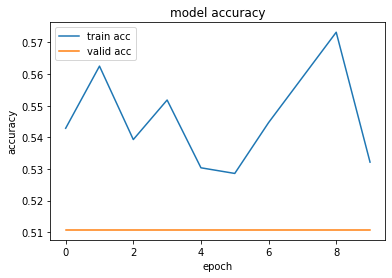

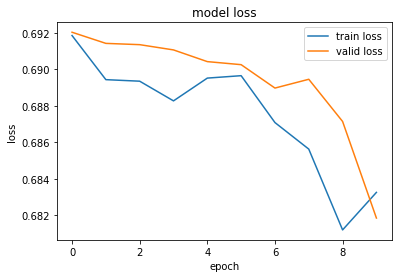

Epoch 1/10
18/18 [==============================] - ETA: 0s - loss: 0.6836 - accuracy: 0.5607 
Epoch 00001: val_accuracy improved from -inf to 0.57500, saving model to /content/drive/My Drive/드라이브/Colab Notebooks/ct_cnn_vgg3.h5
18/18 [==============================] - 1066s 59s/step - loss: 0.6836 - accuracy: 0.5607 - val_loss: 0.6687 - val_accuracy: 0.5750
Epoch 2/10
18/18 [==============================] - ETA: 0s - loss: 0.6770 - accuracy: 0.5911 
Epoch 00002: val_accuracy improved from 0.57500 to 0.92500, saving model to /content/drive/My Drive/드라이브/Colab Notebooks/ct_cnn_vgg3.h5
18/18 [==============================] - 1068s 59s/step - loss: 0.6770 - accuracy: 0.5911 - val_loss: 0.6734 - val_accuracy: 0.9250
Epoch 3/10
18/18 [==============================] - ETA: 0s - loss: 0.6623 - accuracy: 0.6446 
Epoch 00003: val_accuracy did not improve from 0.92500
18/18 [==============================] - 1063s 59s/step - loss: 0.6623 - accuracy: 0.6446 - val_loss: 0.6304 - val_accu

In [ ]:
for train_index, test_index in kf.split(X_train_vgg, y_train_vgg):
    X_train = X_train_vgg[train_index]
    y_train = y_train_vgg[train_index]
    X_valid = X_train_vgg[test_index]
    y_valid = y_train_vgg[test_index]
    
    early_stopping = EarlyStopping(monitor='val_loss', mode='min', baseline=0.7, patience=3)
    
    lr_scheduler = ReduceLROnPlateau(monitor="val_loss",
                                 factor=0.1, 
                                 patience=3, 
                                 verbose=1,
                                 min_delta=1e-4, 
                                 min_lr=1e-4) 
    model_saver = ModelCheckpoint(filepath = "/content/drive/My Drive/드라이브/Colab Notebooks/ct_cnn_vgg3.h5",
                             monitor = 'val_accuracy',
                             mode = 'max',
                             verbose=1,
                             save_best_only=True)
    
    vgg2_train = model.fit(X_train, y_train,
                           validation_data=(X_valid, y_valid), 
                           epochs = 10,
                           callbacks = [early_stopping, model_saver, lr_scheduler])
  
    
    # Accuracy
    plt.plot(vgg2_train.history['accuracy'], label='train acc')
    plt.plot(vgg2_train.history['val_accuracy'], label='valid acc')
    plt.title('model accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend()
    plt.show()
    plt.savefig('Vgg2_accuracy')

    # Loss
    plt.plot(vgg2_train.history['loss'], label='train loss')
    plt.plot(vgg2_train.history['val_loss'], label='valid loss')
    plt.title('model loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend()
    plt.show()
    plt.savefig('Vgg2_loss')

In [ ]:
from keras.models import load_model

In [ ]:
load_models = load_model("/content/drive/My Drive/드라이브/Colab Notebooks/ct_cnn_vgg2.h5")
load_models.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 224)               5619936   
_________________________________________________________________
dropout (Dropout)            (None, 224)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 450       
Total params: 20,335,074
Trainable params: 20,335,074
Non-trainable params: 0
_________________________________________________________________


In [ ]:
input_shape = (224, 224, 3)
model = Sequential()
model.add(load_models)
model.add(Flatten())
model.add(Dense(224,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(2,activation="softmax"))
model.compile(optimizer='Adam',
              loss='categorical_crossentropy' ,
              metrics=['accuracy'])

In [ ]:
scores = model.evaluate(X_test_vgg, y_test_vgg)
print('Test loss: {:.4f}, Test accuracy: {:.4f}'.format(scores[0], scores[1]))

7/7 [==============================] - 89s 13s/step - loss: 0.7238 - accuracy: 0.4976
Test loss: 0.7238, Test accuracy: 0.4976


In [ ]:
load_models = load_model("/content/drive/My Drive/드라이브/Colab Notebooks/ct_cnn_vgg3.h5")
load_models.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 224)               5619936   
_________________________________________________________________
dropout (Dropout)            (None, 224)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 450       
Total params: 20,335,074
Trainable params: 20,335,074
Non-trainable params: 0
_________________________________________________________________


In [ ]:
input_shape = (224, 224, 3)
model = Sequential()
model.add(load_models)
model.add(Flatten())
model.add(Dense(224,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(2,activation="softmax"))
model.compile(optimizer='Adam',
              loss='categorical_crossentropy' ,
              metrics=['accuracy'])

In [ ]:
scores = model.evaluate(X_test_vgg, y_test_vgg)
print('Test loss: {:.4f}, Test accuracy: {:.4f}'.format(scores[0], scores[1]))

7/7 [==============================] - 89s 13s/step - loss: 0.6932 - accuracy: 0.4976
Test loss: 0.6932, Test accuracy: 0.4976


## 4. Pretrained Model

### 1) Pretrained Model 생성

In [ ]:
!unzip ./data/covid-19-ct-new-image/CT_NonCOVID.zip -d ./data/covid-19-ct-new-image/NonCOVID

Archive:  ./data/covid-19-ct-new-image/CT_NonCOVID.zip
  inflating: ./data/covid-19-ct-new-image/NonCOVID/CT_NonCOVID/0.jpg  
  inflating: ./data/covid-19-ct-new-image/NonCOVID/CT_NonCOVID/1%0.jpg  
  inflating: ./data/covid-19-ct-new-image/NonCOVID/CT_NonCOVID/1%1.jpg  
  inflating: ./data/covid-19-ct-new-image/NonCOVID/CT_NonCOVID/1%2.jpg  
  inflating: ./data/covid-19-ct-new-image/NonCOVID/CT_NonCOVID/10%0.jpg  
  inflating: ./data/covid-19-ct-new-image/NonCOVID/CT_NonCOVID/10%1.jpg  
  inflating: ./data/covid-19-ct-new-image/NonCOVID/CT_NonCOVID/10%2.jpg  
  inflating: ./data/covid-19-ct-new-image/NonCOVID/CT_NonCOVID/102.png  
  inflating: ./data/covid-19-ct-new-image/NonCOVID/CT_NonCOVID/1029.png  
  inflating: ./data/covid-19-ct-new-image/NonCOVID/CT_NonCOVID/103.png  
  inflating: ./data/covid-19-ct-new-image/NonCOVID/CT_NonCOVID/1030.png  
  inflating: ./data/covid-19-ct-new-image/NonCOVID/CT_NonCOVID/104.png  
  inflating: ./data/covid-19-ct-new-image/NonCOVID/CT_NonCOVID/104

In [ ]:
!unzip ./data/covid-19-ct-new-image/CT_COVID.zip -d ./data/covid-19-ct-new-image/COVID

Archive:  ./data/covid-19-ct-new-image/CT_COVID.zip
   creating: ./data/covid-19-ct-new-image/COVID/CT_COVID/
  inflating: ./data/covid-19-ct-new-image/COVID/CT_COVID/2020.03.01.20029769-p21-73_1%1.png  
   creating: ./data/covid-19-ct-new-image/COVID/__MACOSX/
   creating: ./data/covid-19-ct-new-image/COVID/__MACOSX/CT_COVID/
  inflating: ./data/covid-19-ct-new-image/COVID/__MACOSX/CT_COVID/._2020.03.01.20029769-p21-73_1%1.png  
  inflating: ./data/covid-19-ct-new-image/COVID/CT_COVID/Recurrence-of-positive-SARS-CoV-2-RNA-in-C_2020_International-Journal-of-Inf-p1-21%1.png  
  inflating: ./data/covid-19-ct-new-image/COVID/__MACOSX/CT_COVID/._Recurrence-of-positive-SARS-CoV-2-RNA-in-C_2020_International-Journal-of-Inf-p1-21%1.png  
  inflating: ./data/covid-19-ct-new-image/COVID/CT_COVID/2020.03.12.20034686-p17-91-4.png  
  inflating: ./data/covid-19-ct-new-image/COVID/__MACOSX/CT_COVID/._2020.03.12.20034686-p17-91-4.png  
  inflating: ./data/covid-19-ct-new-image/COVID/CT_COVID/2020.02

In [ ]:
import cv2

In [ ]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename), cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, dsize=(256, 256), interpolation=cv2.INTER_AREA)
        if img is not None:
            images.append(img)
    return images

In [ ]:
infect_dir = './data/covid-19-ct-new-image/COVID/CT_COVID/'
not_dir = './data/covid-19-ct-new-image/NonCOVID/CT_NonCOVID/'

In [ ]:
infected = load_images_from_folder(infect_dir)
n_infected = load_images_from_folder(not_dir)

In [ ]:
print('Infected: {}, Not_Infected: {}'.format(len(infected),len(n_infected)))

Infected: 349, Not_Infected: 397


In [ ]:
def plot_images(images, title):
    nrows, ncols = 5, 8
    figsize = [10, 6]

    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize, facecolor=(1, 1, 1))

    for i, axi in enumerate(ax.flat):
        axi.imshow(images[i], cmap='gray')
        axi.set_axis_off()

    plt.suptitle(title, fontsize=24)
    plt.tight_layout(pad=0.2, rect=[0, 0, 1, 0.9])
    plt.show()

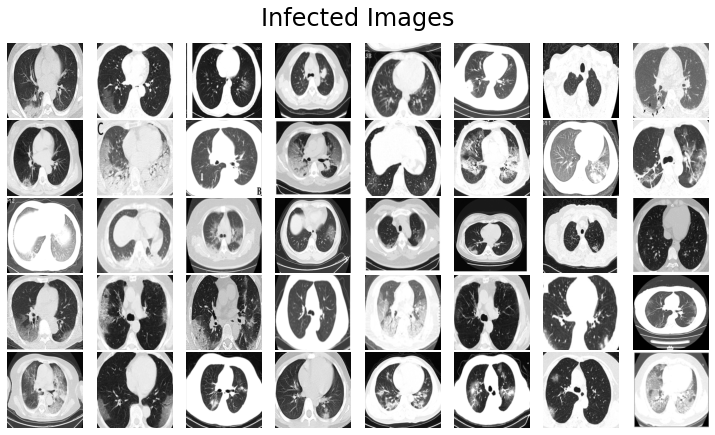

In [ ]:
plot_images(infected, 'Infected Images')

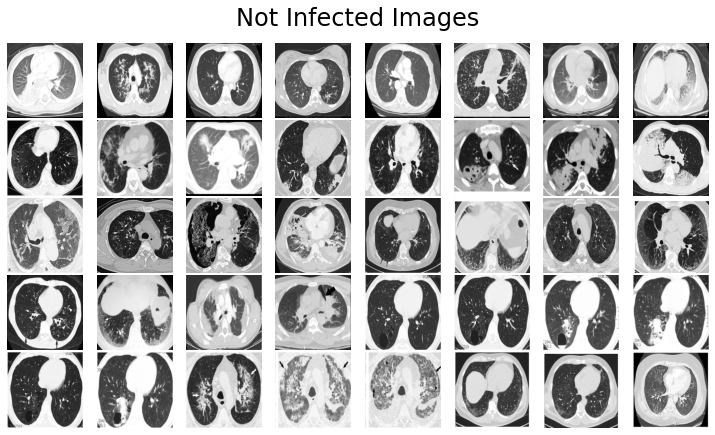

In [ ]:
plot_images(n_infected, 'Not Infected Images')

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
infected.extend(n_infected)
X = np.asarray(infected).reshape((-1,256,256,1)).astype('float32')/255.

In [ ]:
labels = []
for i in range(349):
    labels.append(['0'])
for i in range(397):
    labels.append(['1'])

In [ ]:
y = np.asarray(labels).astype('float32').reshape((-1,1))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

In [ ]:
input_shape = (256, 256, 1)

In [ ]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation="relu",input_shape=input_shape))

model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512,activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(1,activation="sigmoid"))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 254, 254, 32)      320       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 252, 252, 64)      18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 126, 126, 64)      0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 126, 126, 64)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 124, 124, 64)      36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 62, 62, 64)       

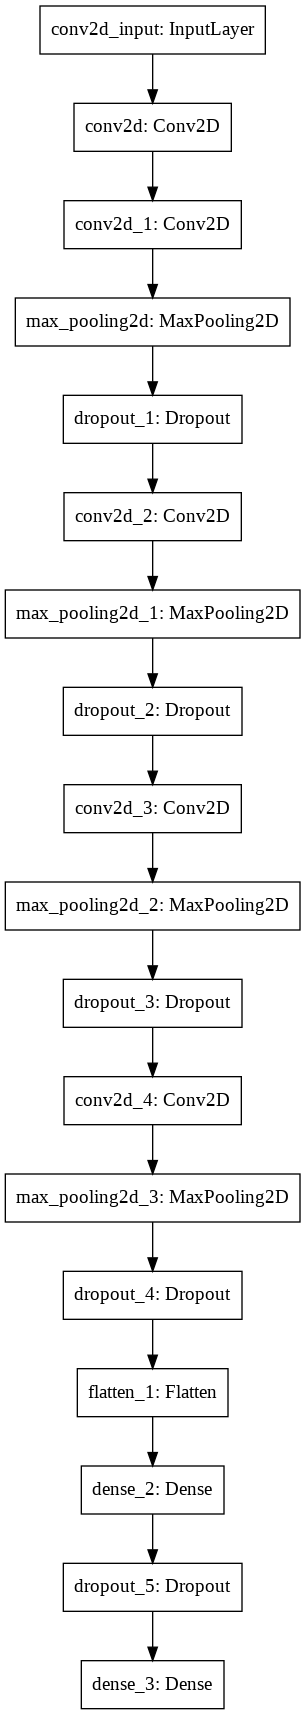

In [ ]:
plot_model(model)

In [ ]:
from tensorflow.keras.optimizers import Adam

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', mode='min', baseline=0.7, patience=3)

In [ ]:
model_saver = ModelCheckpoint(filepath = "/content/drive/My Drive/드라이브/Colab Notebooks/ct_cnn_new.h5",
                             monitor = 'val_accuracy',
                             mode = 'max',
                             verbose=1,
                             save_best_only=True)

In [ ]:
lr_scheduler = ReduceLROnPlateau(monitor="val_loss",
                                 factor=0.1, 
                                 patience=3, 
                                 verbose=1,
                                 min_delta=1e-4, 
                                 min_lr=1e-4) 

In [ ]:
model_pretrain = model.fit(X_train, y_train,
                        validation_data=(X_test, y_test),
                        steps_per_epoch = 10, 
                        epochs = 50,
                        callbacks = [early_stopping, model_saver, lr_scheduler])

Epoch 1/50
10/10 [==============================] - ETA: 0s - loss: 0.8303 - accuracy: 0.5285 
Epoch 00001: val_accuracy improved from -inf to 0.53333, saving model to /content/drive/My Drive/드라이브/Colab Notebooks/ct_cnn_new.h5
10/10 [==============================] - 199s 20s/step - loss: 0.8303 - accuracy: 0.5285 - val_loss: 0.6919 - val_accuracy: 0.5333
Epoch 2/50
10/10 [==============================] - ETA: 0s - loss: 0.6917 - accuracy: 0.5319 
Epoch 00002: val_accuracy did not improve from 0.53333
10/10 [==============================] - 195s 20s/step - loss: 0.6917 - accuracy: 0.5319 - val_loss: 0.6914 - val_accuracy: 0.5333
Epoch 3/50
10/10 [==============================] - ETA: 0s - loss: 0.6920 - accuracy: 0.5386 
Epoch 00003: val_accuracy did not improve from 0.53333
10/10 [==============================] - 197s 20s/step - loss: 0.6920 - accuracy: 0.5386 - val_loss: 0.6913 - val_accuracy: 0.5333
Epoch 4/50
10/10 [==============================] - ETA: 0s - loss: 0.6905 -

In [ ]:
import matplotlib.pyplot as plt

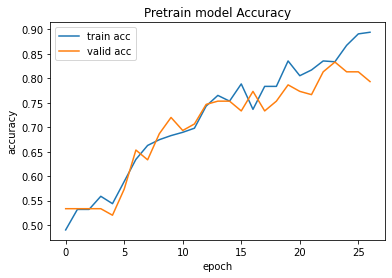

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(model_pretrain.history['accuracy'], label='train acc')
plt.plot(model_pretrain.history['val_accuracy'], label='valid acc')
plt.legend()
plt.title('Pretrain model Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.savefig('Cnn_accuracy')

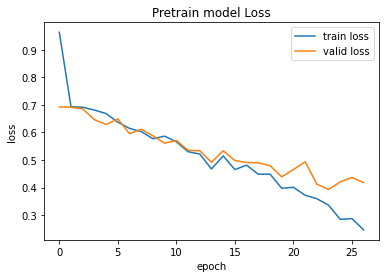

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(model_pretrain.history['loss'], label='train loss')
plt.plot(model_pretrain.history['val_loss'], label='valid loss')
plt.legend()
plt.title('Pretrain model Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()
plt.savefig('Cnn_loss')

### 2) Pretrained Model 학습

In [ ]:
from keras.models import load_model

In [ ]:
load_model = load_model("/content/drive/My Drive/드라이브/Colab Notebooks/ct_cnn_new.h5")
load_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 254, 254, 32)      320       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 252, 252, 64)      18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 126, 126, 64)      0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 126, 126, 64)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 124, 124, 64)      36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 62, 62, 64)       

In [ ]:
model = Sequential()
model.add(load_model)
model.add(Flatten())
model.add(Dense(256,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(1,activation="sigmoid"))

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

In [ ]:
train_dir = "./data/covid19-ct-image/COVID_CT/Train"
valid_dir = "./data/covid19-ct-image/COVID_CT/Valid"
test_dir = "./data/covid19-ct-image/COVID_CT/Test"

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
IMAGE_SIZE = (256, 256)
BATCH_SIZE = 32
NUM_EPOCHS = 50

In [ ]:
train_datagen = ImageDataGenerator(
        rescale=1. / 255,
        rotation_range=5,
        width_shift_range=0.05,
        height_shift_range=0.05,
        brightness_range=[0.5, 1.0],
        zoom_range=0.15
    )

In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=IMAGE_SIZE,
        batch_size=BATCH_SIZE,
        color_mode='grayscale',
        class_mode='binary'
    )

Found 840 images belonging to 2 classes.


In [ ]:
test_datagen = ImageDataGenerator(rescale = 1. / 255)

In [ ]:
validation_generator = test_datagen.flow_from_directory(
        valid_dir,
        target_size=IMAGE_SIZE,
        batch_size=BATCH_SIZE,
        color_mode='grayscale',
        class_mode='binary'
    )

Found 105 images belonging to 2 classes.


In [ ]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=IMAGE_SIZE,
        shuffle=False,
        color_mode='grayscale',
        class_mode='binary'
    )

Found 106 images belonging to 2 classes.


In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', mode='min', baseline=0.7, patience=3) 

In [ ]:
model_saver = ModelCheckpoint(filepath = "/content/drive/My Drive/드라이브/Colab Notebooks/ct_cnn_uspt.h5",
                             monitor = 'val_accuracy',
                             mode = 'max',
                             verbose=1,
                             save_best_only=True)

In [ ]:
lr_scheduler = ReduceLROnPlateau(monitor="val_loss",
                                 factor=0.1, 
                                 patience=3, 
                                 verbose=1,
                                 min_delta=1e-4, 
                                 min_lr=1e-4) 

In [ ]:
model_uspt = model.fit_generator(train_generator, 
                                  validation_data=validation_generator,
                                  steps_per_epoch = 10, 
                                  epochs = NUM_EPOCHS,
                                  callbacks = [early_stopping, model_saver, lr_scheduler])

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
10/10 [==============================] - ETA: 0s - loss: 0.6930 - accuracy: 0.5203 
Epoch 00001: val_accuracy improved from -inf to 0.48571, saving model to /content/drive/My Drive/드라이브/Colab Notebooks/ct_cnn_uspt.h5
10/10 [==============================] - 135s 14s/step - loss: 0.6930 - accuracy: 0.5203 - val_loss: 0.6950 - val_accuracy: 0.4857
Epoch 2/50
10/10 [==============================] - ETA: 0s - loss: 0.6924 - accuracy: 0.5250 
Epoch 00002: val_accuracy did not improve from 0.48571
10/10 [==============================] - 112s 11s/step - loss: 0.6924 - accuracy: 0.5250 - val_loss: 0.6934 - val_accuracy: 0.4857
Epoch 3/50
10/10 [==============================] - ETA: 0s - loss: 0.6895 - accuracy: 0.5875 
Epoch 00003: val_accuracy did not improve from 0.48571
10/10 [==============================] - 112s 11s/step - loss: 0.6895 - accuracy: 0.5875 - val_loss: 0.6934 - val_accuracy: 0.3905

In [ ]:
scores = model.evaluate_generator(test_generator)
print('Test loss: {:.4f}, Test accuracy: {:.4f}'.format(scores[0], scores[1]))

Instructions for updating:
Please use Model.evaluate, which supports generators.
Test loss: 0.1399, Test accuracy: 0.9717


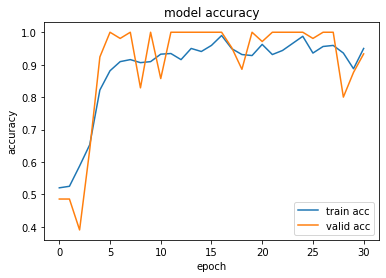

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(model_uspt.history['accuracy'], label='train acc')
plt.plot(model_uspt.history['val_accuracy'], label='valid acc')
plt.legend()
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.savefig('Cnn_uspt_accuracy')

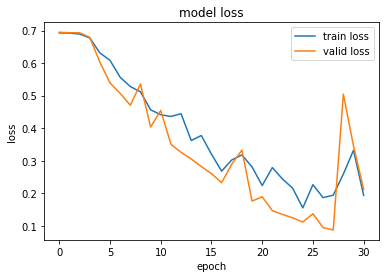

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(model_uspt.history['loss'], label='train loss')
plt.plot(model_uspt.history['val_loss'], label='valid loss')
plt.legend()
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()
plt.savefig('Cnn_uspt_loss')